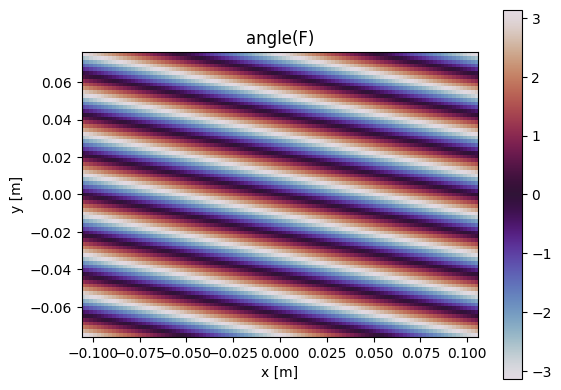

In [1]:
"""
Rad229_Fourier_Encoding demonstrates some Fourier sampling functions.

SYNTAX:
    acq, F = Rad229_Fourier_Encoding(acq)

INPUTS (acq dictionary):
    acq['FOVx']   = 210e-3  # Field-of-view along x-direction [m]
    acq['Nx']     = 21      # Number of pixels to discretize FOVx
    acq['FOVy']   = 150e-3  # Field-of-view along y-direction [m]
    acq['Ny']     = 15      # Number of pixels to discretize FOVy
    acq['n_kx']   = 0       # Fourier kx sampling point (=0 is center of k-space)
    acq['n_ky']   = 4       # Fourier ky sampling point (=0 is center of k-space)
    acq['upsamp'] = 5       # Upsampling factor for visualizing patterns

OUTPUTS:
    acq : Acquisition parameter dictionary
    F   : 2D numpy array representing the Fourier encoding pattern

Original MATLAB version by dbe@stanford.edu (March 2021) for Rad229
First Python version by dbe@stanford.edu (March 2025) for Rad229
"""

# Exploration Questions (for learning and experimenting):
#
# 1) Set acq['n_kx'] = 3 and acq['n_ky'] = 0. 
#    - How many phase cycles do you see along the frequency-encode (x) direction?
#
# 2) Set acq['n_kx'] = 0 and acq['n_ky'] = 4.
#    - How many phase cycles do you see along the phase-encode (y) direction?
#
# 3) Set acq['n_kx'] = 2 and acq['n_ky'] = 5.
#    - How many phase cycles do you see along both phase and frequency encode directions?
#
# 4) If you set acq['n_kx'] = kx_max and acq['n_ky'] = ky_max,
#    - Does this satisfy Nyquist sampling? Explain.
#
# Advanced:
# 5) Revise the code to compute the applied phase and frequency encoding gradients,
#    then derive dkx and dky from those gradient values.
#
# 6) Use this code to estimate Fourier coefficients for an object,
#    then use an FFT to reconstruct the image of the object.
#
# 7) Use this code to demonstrate field-of-view aliasing and compressed-sensing artifacts.

import numpy as np
import matplotlib.pyplot as plt

# def Rad229_Fourier_Encoding(acq=None): # You can turn this into a function if you want to.
acq=None    # Comment out if you want to use this as a function

# Define acquisition parameters if not provided
if acq is None:
    acq = {
        'FOVx': 210e-3,  # Field-of-view along x-direction [m]
        'Nx': 21,        # Number of pixels along x-direction
        'FOVy': 150e-3,  # Field-of-view along y-direction [m]
        'Ny': 15,        # Number of pixels along y-direction
        'n_kx': 2,
        'n_ky': 7,
        'upsamp': 5,     # Upsampling factor
    }
    fig_display = True
else:
    fig_display = False

# Check the index is within range
if abs(acq['n_kx']) > ( (acq['Nx'] - 1) / 2 ):
        print("Warning: acq['n_kx'] will exceed kx_max.")
if abs(acq['n_ky']) > ( (acq['Ny'] - 1) / 2 ):
        print("Warning: acq['n_ky'] will exceed ky_max.")

# Calculate spatial positions
acq['x_pos'] = np.linspace(-acq['FOVx']/2, acq['FOVx']/2, acq['upsamp'] * acq['Nx'])
acq['y_pos'] = np.linspace(-acq['FOVy']/2, acq['FOVy']/2, acq['upsamp'] * acq['Ny'])

acq['X'], acq['Y'] = np.meshgrid(acq['x_pos'], acq['y_pos'], indexing='ij')

# Delta k-space steps
acq['dkx'] = 1 / acq['FOVx']
acq['dky'] = 1 / acq['FOVy']

# Compute the Fourier sampling function
F = np.exp(-1j * 2 * np.pi * (
  acq['n_kx'] * acq['dkx'] * acq['X'] + 
  acq['n_ky'] * acq['dky'] * acq['Y']
))

    # Display the sampling function
if fig_display:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        pcm = ax.pcolormesh(acq['X'], acq['Y'], np.angle(F), shading='auto', cmap='twilight')
        plt.colorbar(pcm, ax=ax)
        ax.set_title('angle(F)')
        ax.set_aspect('equal')
        ax.set_xlabel('x [m]')
        ax.set_ylabel('y [m]')
        plt.show()

#    return acq, F  # Some return variables if you want to use this as a function.